In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import plotly.express as px

In [2]:
with open("../db/ready_data.pkl", 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head(30)

,link,name,price,OS,RAM,ROM,diag,bat
0,https://www.joom.ru/ru/products/66b1ed4d9d659d...,VIVO,99888,Android 14,12,256,6.78,5500
1,https://www.joom.ru/ru/products/66b331016076a0...,Xiaomi,95103,Android 14,12,256,6.73,5300
2,https://www.joom.ru/ru/products/66b2db8e163a53...,OPPO,87747,Android 13,12,256,6.80,5000
3,https://www.joom.ru/ru/products/66d14582603ee1...,NUBIA,92176,Android 14.0,16,512,6.80,6500
4,https://www.joom.ru/ru/products/66b2e3016076a0...,OPPO,89438,Android 14,12,256,6.82,5000


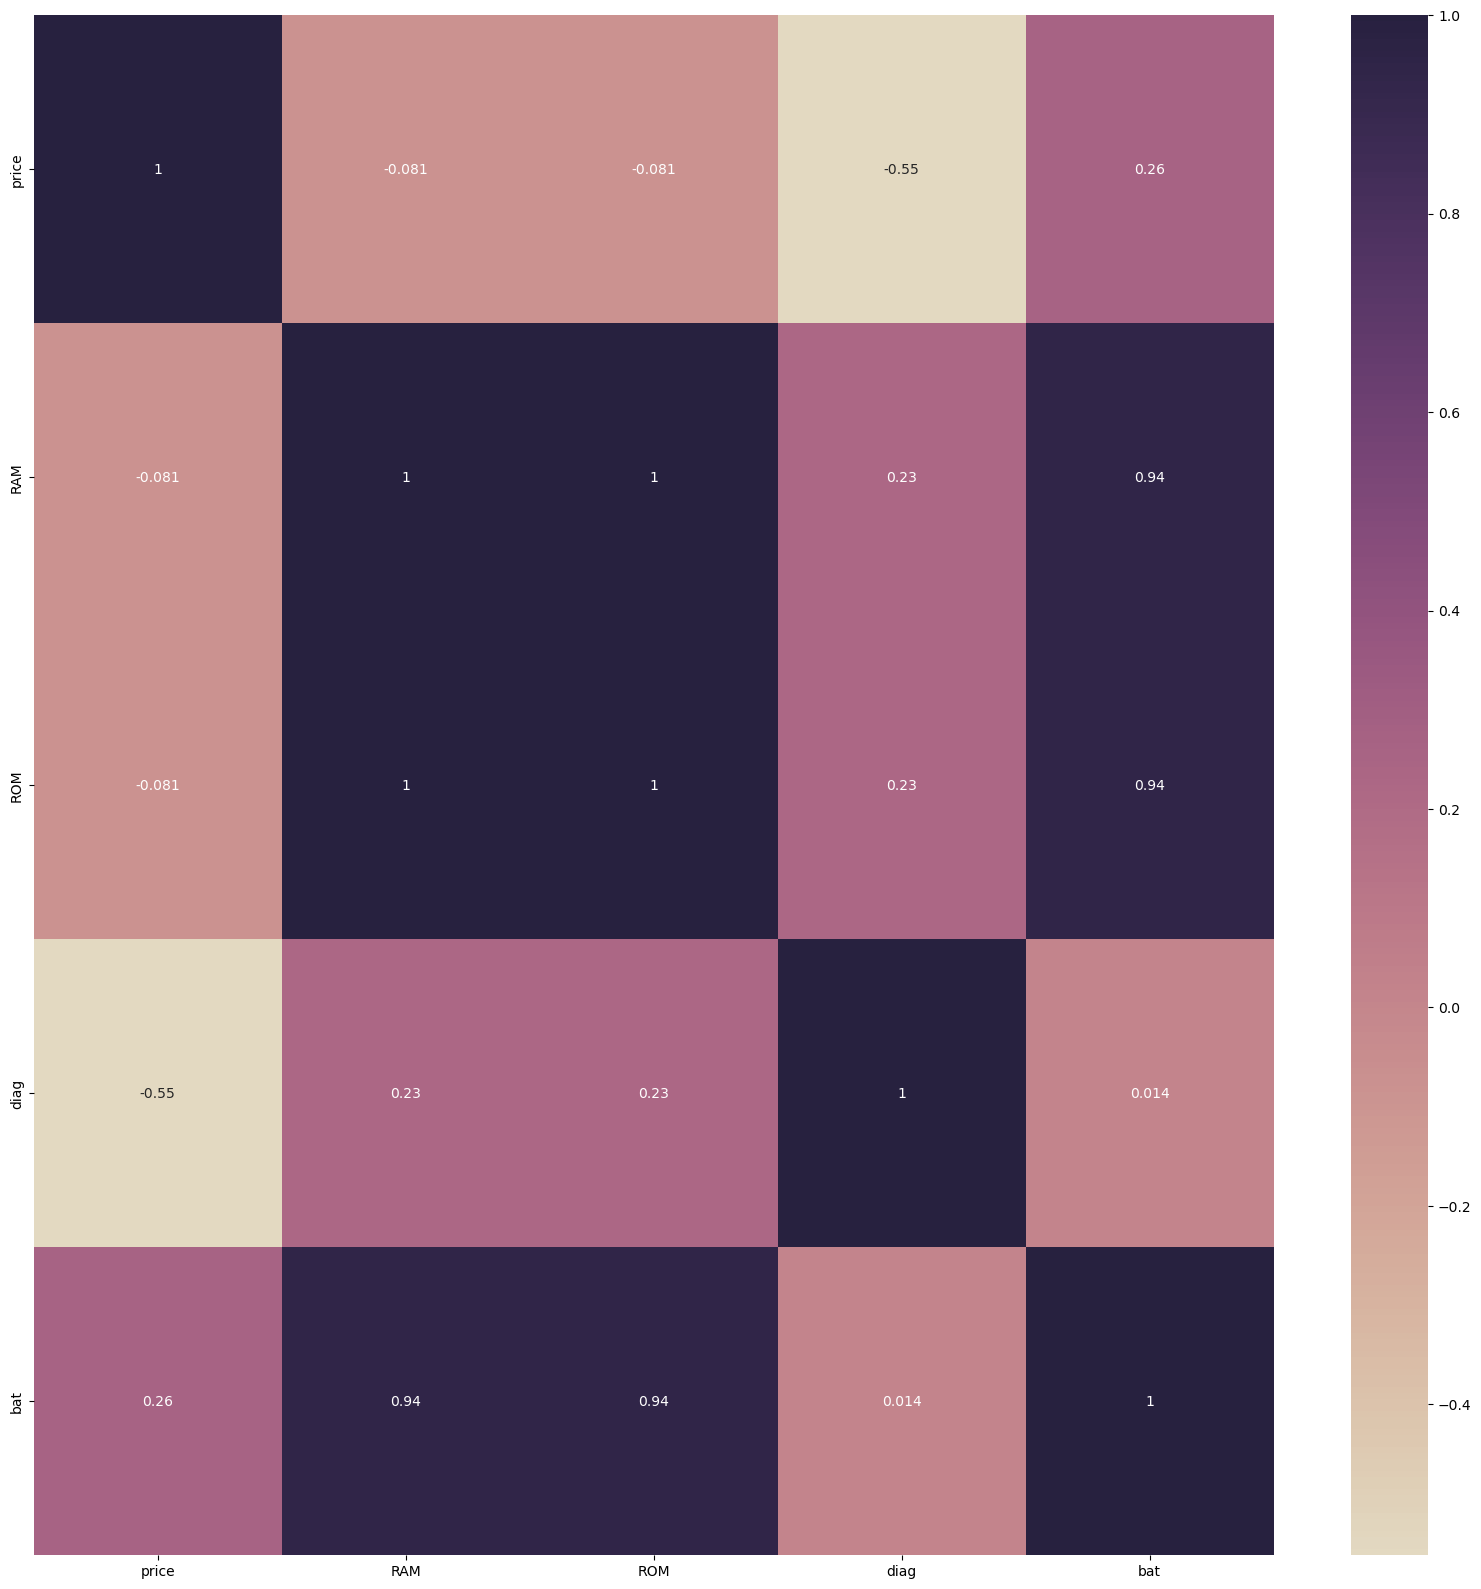

In [6]:
plt.figure(figsize=(20,20))
col_cat = df.select_dtypes(exclude=['object']).columns.tolist()
corr = df[col_cat].corr()
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [9]:
companies = df['name'].unique()

In [10]:
#Функция для перебора продуктов по ценам и кампаниям
def show_difference_in_price_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов от данной кампании:")
        print("{}: {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='RAM', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов от данной кампании:
VIVO: 1
Количество Телефонов от данной кампании:
Xiaomi: 1
Количество Телефонов от данной кампании:
OPPO: 2
Количество Телефонов от данной кампании:
NUBIA: 1


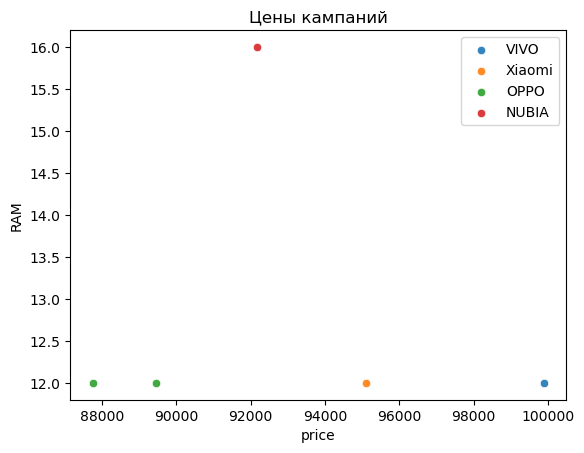

In [11]:
show_difference_in_price_with_companies(df)

In [12]:
"""

Как видно из графиков представленных выше - компания что предоставляет телефоны - разительно
сказывается на цене конечного продукта, что поставляется пользователям.

"""

'\n\nКак видно из графиков представленных выше - компания что предоставляет телефоны - разительно\nсказывается на цене конечного продукта, что поставляется пользователям.\n\n'

In [13]:
"""

Камера разительно не сказывается на стоимости конечного продукта, если не говорить о телефонах
дешёвого сегмента

"""

'\n\nКамера разительно не сказывается на стоимости конечного продукта, если не говорить о телефонах\nдешёвого сегмента\n\n'

In [14]:
"""

Количество отзывов, что оставляют пользователи - крайне сильно сказываются на продажах телефона
в сети джум. Однако тут может быть и взаимосвязь сказываться в том, что потенциальные покупатели
знали о продукте ещё до его приобретения из других источников. Уже из этого можно сделать вывод,
что рекламые кампании, а так-же общее слово людей о продукте - разительно повышает его популяроность,
а в общем итоге - продажи

"""

'\n\nКоличество отзывов, что оставляют пользователи - крайне сильно сказываются на продажах телефона\nв сети джум. Однако тут может быть и взаимосвязь сказываться в том, что потенциальные покупатели\nзнали о продукте ещё до его приобретения из других источников. Уже из этого можно сделать вывод,\nчто рекламые кампании, а так-же общее слово людей о продукте - разительно повышает его популяроность,\nа в общем итоге - продажи\n\n'

In [15]:
#Функция для перебора продуктов по ОЗУ, ценам и кампаниям
def show_difference_in_RAM_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с ОЗУ различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='ROM', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с ОЗУ различных характеристик:
Телефон VIVO: количество отзывов 1
Количество Телефонов с ОЗУ различных характеристик:
Телефон Xiaomi: количество отзывов 1
Количество Телефонов с ОЗУ различных характеристик:
Телефон OPPO: количество отзывов 2
Количество Телефонов с ОЗУ различных характеристик:
Телефон NUBIA: количество отзывов 1


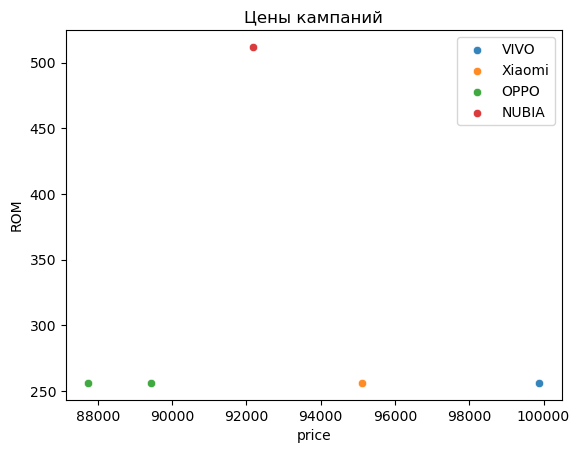

In [16]:
show_difference_in_RAM_with_companies(df)

In [17]:
#Функция для перебора продуктов по диагоналям, ценам и кампаниям
def show_difference_in_diag_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с Диагональю различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='diag', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с Диагональю различных характеристик:
Телефон VIVO: количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон Xiaomi: количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон OPPO: количество отзывов 2
Количество Телефонов с Диагональю различных характеристик:
Телефон NUBIA: количество отзывов 1


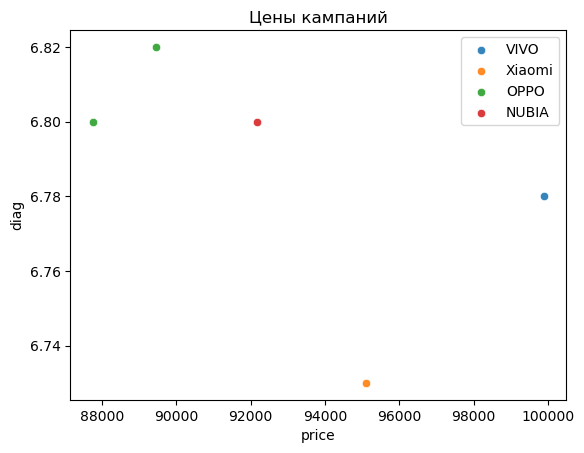

In [18]:
show_difference_in_diag_with_companies(df)

In [19]:
#Функция для перебора продуктов по диагоналям, ценам и кампаниям
def show_difference_in_bat_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с Диагональю различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='bat', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с Диагональю различных характеристик:
Телефон VIVO: количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон Xiaomi: количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон OPPO: количество отзывов 2
Количество Телефонов с Диагональю различных характеристик:
Телефон NUBIA: количество отзывов 1


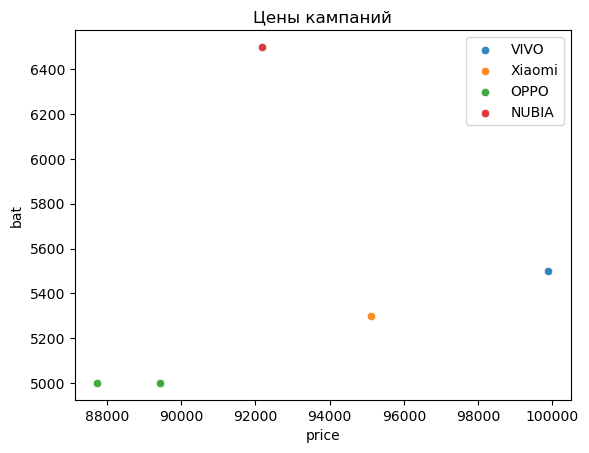

In [20]:
show_difference_in_bat_with_companies(df)

In [21]:
"""

Характеристики значительно сказываются на конечной цене, однако в ограниченном значении.
Большую играет роль реклама а так-же имя бренда.
Наибольшую разницу в ценах приносит именно батарея, ибо аккумуляторы с большим объемом -
- сказываются на стоимости телефона больше всего.

"""

'\n\nХарактеристики значительно сказываются на конечной цене, однако в ограниченном значении.\nБольшую играет роль реклама а так-же имя бренда.\nНаибольшую разницу в ценах приносит именно батарея, ибо аккумуляторы с большим объемом -\n- сказываются на стоимости телефона больше всего.\n\n'

In [26]:
from IPython.core.display import display, HTML
import warnings


In [41]:
i = 0
while i < len(df.index):
    display(HTML("<a href='{0}' target='_blank'>{1}</a>".format(df.link[i],df.name[i])))
    i += 1